In [1]:
#import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

### Traffic Data Cleaning & Formatting

* Read to csv file and clean traffic data

In [6]:
#read into our traffic csv file and assign it a dataframe
traffic_path = "traffic_data/traffic.csv"
traffic_df = pd.read_csv(traffic_path)
traffic_df.head()

,TIME,REGION_ID,SPEED,REGION,BUS_COUNT,NUM_READS,HOUR,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION
0,06/14/2018 05:20:48 AM,13,21.82,Chicago Loop,31,396,5,5,6,Roosevelt to Wacker: Halsted to Michigan,13-201806141020,-87.647208,-87.62308,41.866129,41.88886,POINT (-87.647208 41.88886),POINT (-87.62308 41.866129)
1,09/15/2018 09:40:23 AM,13,16.36,Chicago Loop,61,921,9,7,9,Roosevelt to Wacker: Halsted to Michigan,13-201809151440,-87.647208,-87.62308,41.866129,41.88886,POINT (-87.647208 41.88886),POINT (-87.62308 41.866129)
2,03/13/2018 09:40:38 AM,13,12.95,Chicago Loop,165,2607,9,3,3,Roosevelt to Wacker: Halsted to Michigan,13-201803131440,-87.647208,-87.62308,41.866129,41.88886,POINT (-87.647208 41.88886),POINT (-87.62308 41.866129)
3,03/13/2018 06:31:33 PM,13,12.27,Chicago Loop,158,2333,18,3,3,Roosevelt to Wacker: Halsted to Michigan,13-201803132331,-87.647208,-87.62308,41.866129,41.88886,POINT (-87.647208 41.88886),POINT (-87.62308 41.866129)
4,03/13/2018 09:50:55 AM,13,14.32,Chicago Loop,144,2049,9,3,3,Roosevelt to Wacker: Halsted to Michigan,13-201803131450,-87.647208,-87.62308,41.866129,41.88886,POINT (-87.647208 41.88886),POINT (-87.62308 41.866129)


In [7]:
# select only the columns that we want
traffic_df = traffic_df[["TIME","SPEED","BUS_COUNT","NUM_READS","MONTH"]]

# convert items in time column to datetime-type items and 
traffic_df["TIME"] = pd.to_datetime(traffic_df["TIME"])

# retrive information of month,day and year respectively
traffic_df["MONTH"]= traffic_df["TIME"].dt.month
traffic_df["DAY"] = traffic_df["TIME"].dt.day
traffic_df["YEAR"] = traffic_df["TIME"].dt.year

# relocate the columns and rows
traffic_df = traffic_df[["TIME","YEAR","MONTH","DAY","SPEED","BUS_COUNT","NUM_READS"]]
traffic_df = traffic_df.sort_values(["YEAR","MONTH"],ascending=True)

# select the rows that we want to match the time period of traffic and that of air quality together, drop rows from 2020 May to 2018 July
traffic_df = traffic_df.drop(traffic_df[(traffic_df["YEAR"]==2020)&((traffic_df["MONTH"]==5)|(traffic_df["MONTH"]==6)|(traffic_df["MONTH"]==7))].index)
traffic_df.head()

,TIME,YEAR,MONTH,DAY,SPEED,BUS_COUNT,NUM_READS
2,2018-03-13 09:40:38,2018,3,13,12.95,165,2607
3,2018-03-13 18:31:33,2018,3,13,12.27,158,2333
4,2018-03-13 09:50:55,2018,3,13,14.32,144,2049
5,2018-03-14 04:10:21,2018,3,14,22.50,6,79
6,2018-03-13 10:01:37,2018,3,13,13.64,126,1916


### Plotting our monthly traffic averages & save as png files

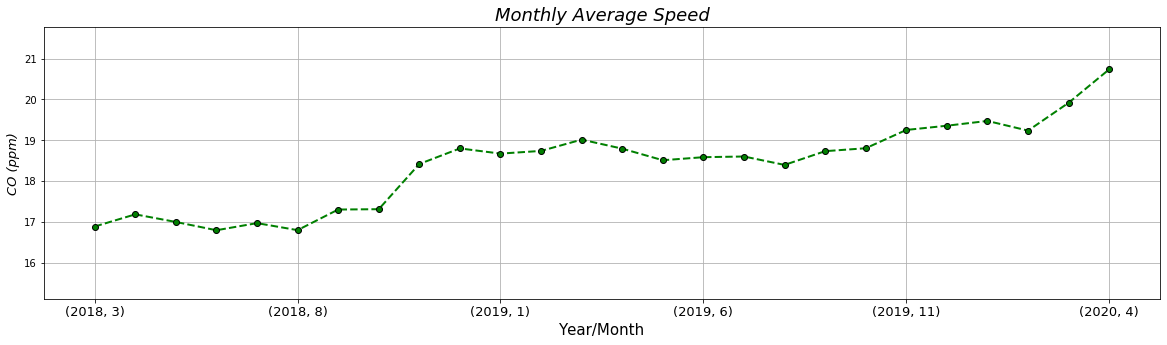

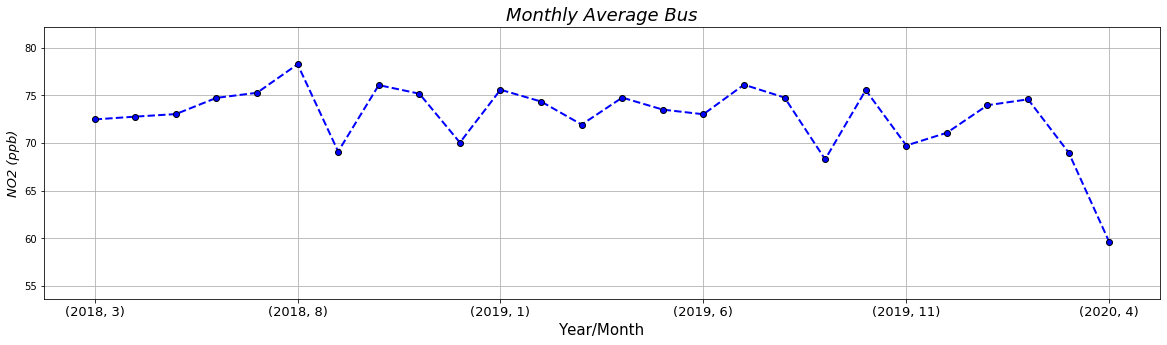

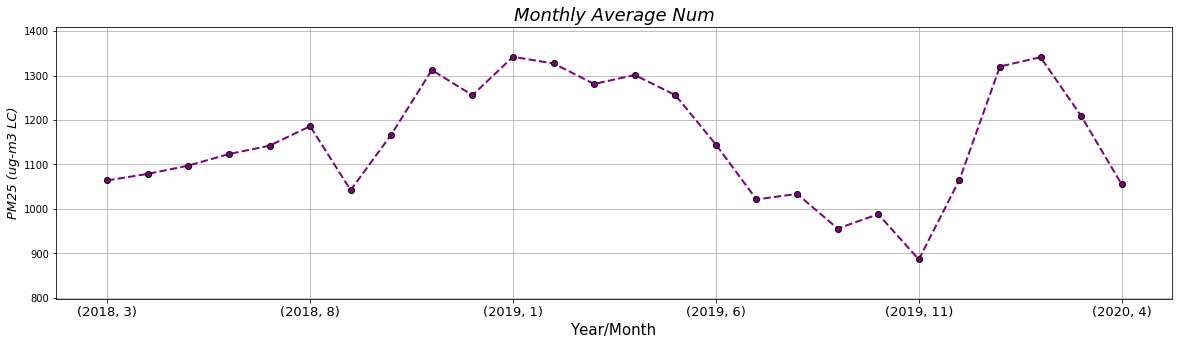

In [8]:
#group by the year and month
ym_df=traffic_df.groupby(["YEAR","MONTH"])

#find the daily average speed, number of bus counts, and number of car reads from March 2018
smonthly_avg=ym_df["SPEED"].mean()
bmonthly_avg=ym_df["BUS_COUNT"].mean()
nmonthly_avg=ym_df["NUM_READS"].mean()

#plot the speed, bus count, and number counts
names=["Speed","Bus","Num"]
y_list=[smonthly_avg,bmonthly_avg,nmonthly_avg]
counter=0    
colors=["green","blue","purple"]

for y in y_list:
    
    #create and format the lines
    group=y.plot(kind="line",figsize=(20,5),
                 color=colors[counter],
                 marker="o",
                 markeredgecolor="black",
                linewidth=2,
                linestyle="--")
    
    plt.title(f"Monthly Average {names[counter]}",
              fontsize=18,
              fontstyle="oblique")
    plt.ylim((y.min()*.9,y.max()*1.05))
    plt.xticks(fontsize=13)
    plt.xlabel("Year/Month",fontsize=15)
    
    plt.ylabel(f"{y_names[counter]}",
               fontsize=13,
               fontstyle="italic")

    plt.grid()
    plt.savefig(f"../plots/{names[counter]}_Monthly_Plot.png")

    counter+=1
    plt.show()

* Slice and format traffic data so that it can be merged with pollutant data to show correlations between the two

In [9]:
#add date column that only includes the date of the traffic measurement recording
traffic_df["Date"]=traffic_df['TIME'].dt.date
#date_df=traffic_df

date_group=traffic_df.groupby("Date")


#get the daily average for the number of cars, bus, and the speed people were going
day_speed=round(date_group["SPEED"].mean(),2)
day_bus=round(date_group["BUS_COUNT"].mean(),0)
day_num=round(date_group["NUM_READS"].mean(),0)

#put the results into a dataframe
day_motor=pd.DataFrame({"SPEED":day_speed,
             "BUS COUNT":day_bus,
             "NUM COUNT":day_num})
day_motor=day_motor.reset_index()
day_motor.head()

,Date,SPEED,BUS COUNT,NUM COUNT
0,2018-03-09,14.85,107.0,1558.0
1,2018-03-10,18.10,48.0,689.0
2,2018-03-11,19.20,36.0,524.0
3,2018-03-12,16.80,83.0,1229.0
4,2018-03-13,16.93,85.0,1277.0


* Remove the outliers from the traffic dataset to avoid skewing

In [10]:
#find outliers for each pollutant daily measurement and remove them from the dataframe
speed=day_motor["SPEED"]
bus=day_motor["BUS COUNT"]
num=day_motor["NUM COUNT"]

#find the upper quantiles, lower quantiles, and iqr to find the bounds and establish outliers 
s_upperq=speed.quantile(.75)
s_lowerq=speed.quantile(.25)
s_IQR=s_upperq-s_lowerq
s_upperb=s_upperq+(1.5*s_IQR)
s_lowerb=s_lowerq-(1.5*s_IQR)

b_upperq=bus.quantile(.75)
b_lowerq=bus.quantile(.25)
b_IQR=b_upperq-b_lowerq
b_upperb=b_upperq+(1.5*s_IQR)
b_lowerb=b_lowerq-(1.5*s_IQR)


n_upperq=num.quantile(.75)
n_lowerq=num.quantile(.25)
n_IQR=n_upperq-n_lowerq
n_upperb=n_upperq+(1.5*s_IQR)
n_lowerb=n_lowerq-(1.5*s_IQR)

#plase our speed, bus, and num count series' in a list along with our bounds to plot the boxplots
boxes=[speed,bus,num]
l_bounds=[s_lowerb,b_lowerb,n_lowerb]
u_bounds=[s_upperb,b_upperb,n_upperb]
  
print(f"For Speed, values below {s_lowerb} and values above {s_upperb}  are outliers.")
print(f"For Bus, values below {b_lowerb} and values above {b_upperb}  are outliers.")
print(f"For Num, values below {n_lowerb} and values above {n_upperb}  are outliers.")

#remove the outliers based on our upper and lower bounds and show the dataframe
day_motor=day_motor.loc[(day_motor["SPEED"]>s_lowerb) &
             (day_motor["SPEED"]<s_upperb) &
             (day_motor["BUS COUNT"]>b_lowerb) &
             (day_motor["BUS COUNT"]<b_upperb) &
              (day_motor["NUM COUNT"]>n_lowerb) &
             (day_motor["NUM COUNT"]<n_upperb)]

%store day_motor
day_motor.head()

For Speed, values below 14.395000000000001 and values above 22.195  are outliers.
For Bus, values below 46.075 and values above 89.925  are outliers.
For Num, values below 835.075 and values above 1455.925  are outliers.
Stored 'day_motor' (DataFrame)


,Date,SPEED,BUS COUNT,NUM COUNT
3,2018-03-12,16.80,83.0,1229.0
4,2018-03-13,16.93,85.0,1277.0
5,2018-03-14,16.49,87.0,1291.0
6,2018-03-15,16.97,86.0,1281.0
7,2018-03-16,15.86,89.0,1301.0


### Pollutants Data Cleaning & Formatting ###

* Create a list and a function that will allow us to save time
* Read csv files and append related tables to one another
* Rename columns for easier reading 
* Add date columns that will be useful when its time to plot

In [11]:
#create a list of our pollutants to use as identifiers within our function
pollutants = ["CO","NO2","PM2.5"]

#create a function to append dataframes based on the pollutant and year
#will allow us to assign independent variables to each dataframe
def pull(p):
    
    #read into each csv based on the pollutant and assign it a dataframe name
    df_2018 = pd.read_csv(f"air_quality_data/resources/{p}_2018.csv")
    df_2019 = pd.read_csv(f"air_quality_data/resources/{p}_2019.csv")
    df_2020 = pd.read_csv(f"air_quality_data/resources/{p}_2020.csv")
    
    #append the 3 separate pollutant dataframes into one
    df = df_2018.append([df_2019,df_2020])
    
    #rename the name of the pollutant column
    df = df.rename(columns={"AQS_PARAMETER_DESC":"POLLUTANT"})
    
    #make the abbreviation the name of our pollutant
    df["ABBREVIATION"] = p
    
    #format our date columns
    df["Date"] = pd.to_datetime(df["Date"])
    df["MONTH"] = df["Date"].dt.month
    df["DAY"] = df["Date"].dt.day
    df["YEAR"] = df["Date"].dt.year
    
    #select the columns we want
    #the time period measurement of each pollutant varies, so must use df.iloc to select the column number instead of the column name
    df = df.iloc[:,np.r_[0,4:8,9,11,18:24]]
    #select the rows that we want to match the time period of traffic and that of air quality together, drop rows from 2018 Jan to 2018 Feb
    df = df.drop(df[(df["YEAR"]==2018)&((df["MONTH"]==1)|(df["MONTH"]==2))].index)
    df = df.drop(df[(df["YEAR"]==2020)&((df["MONTH"]==7)|(df["MONTH"]==6)|(df["MONTH"]==5))].index)
    return df

CO_df=pull(pollutants[0])
NO2_df=pull(pollutants[1])
PM25_df=pull(pollutants[2])

#check one of the dataframes
CO_df.head()

,Date,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,PERCENT_COMPLETE,POLLUTANT,SITE_LATITUDE,SITE_LONGITUDE,ABBREVIATION,MONTH,DAY,YEAR
52,2018-03-07,0.3,ppm,3,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,7,2018
53,2018-03-08,0.6,ppm,7,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,8,2018
54,2018-03-09,0.6,ppm,7,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,9,2018
55,2018-03-10,0.5,ppm,6,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,10,2018
56,2018-03-11,0.3,ppm,3,NORTHBROOK WATER PLANT,100.0,Carbon monoxide,42.139996,-87.799227,CO,3,11,2018


* Remove incomplete data 
* Groupby year and date and create monthly means for each pollutant

In [12]:
#select only monitor checks that were 100% complete for the day to avoid having incomplete data
co_clean_df=CO_df.loc[CO_df["PERCENT_COMPLETE"] == 100.0,:]

#create a groupby function by the year and the month to get monthly data
co_time_group=co_clean_df.groupby(["YEAR","MONTH"])
co_monthly_mean=co_time_group['Daily Max 8-hour CO Concentration'].mean()  
co_clean_df["Date"]=co_clean_df['Date'].dt.date

#store the values for use in correlation workbook
#store co_monthly_mean
%store co_clean_df

#select only monitor checks that were 100% complete for the day to avoid having incomplete data
no2_clean_df=NO2_df.loc[NO2_df["PERCENT_COMPLETE"] == 100.0,:]

#create a groupby function by the year and the month to get monthly data
no2_time_group=no2_clean_df.groupby(["YEAR","MONTH"])
no2_monthly_mean=no2_time_group['Daily Max 1-hour NO2 Concentration'].mean()  
no2_clean_df["Date"]=no2_clean_df['Date'].dt.date

#store the values for use in correlation workbook
#store no2_monthly_mean
%store no2_clean_df

#select only monitor checks that were 100% complete for the day to avoid having incomplete data
PM25_df_clean_df=PM25_df.loc[PM25_df["PERCENT_COMPLETE"] == 100.0,:]

#create a groupby function by the year and the month to get monthly data
PM25_df_time_group=PM25_df_clean_df.groupby(["YEAR","MONTH"])
PM25_df_monthly_mean=PM25_df_time_group['Daily Mean PM2.5 Concentration'].mean()  
PM25_df_clean_df["Date"]=PM25_df_clean_df['Date'].dt.date

#store the values for use in correlation workbook
#store PM25_df_monthly_mean
%store PM25_df_clean_df

#check one of the clean dataframes
PM25_df_clean_df.head()

Stored 'co_clean_df' (DataFrame)
Stored 'no2_clean_df' (DataFrame)
Stored 'PM25_df_clean_df' (DataFrame)


/Users/ryanngreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ryanngreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ryanngreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,PERCENT_COMPLETE,POLLUTANT,SITE_LATITUDE,SITE_LONGITUDE,ABBREVIATION,MONTH,DAY,YEAR
9,2018-03-01,8.5,ug/m3 LC,35,VILLAGE GARAGE,100.0,PM2.5 - Local Conditions,41.670992,-87.732457,PM2.5,3,1,2018
10,2018-03-03,5.6,ug/m3 LC,23,VILLAGE GARAGE,100.0,PM2.5 - Local Conditions,41.670992,-87.732457,PM2.5,3,3,2018
11,2018-03-09,8.7,ug/m3 LC,36,VILLAGE GARAGE,100.0,PM2.5 - Local Conditions,41.670992,-87.732457,PM2.5,3,9,2018
12,2018-03-21,2.0,ug/m3 LC,8,VILLAGE GARAGE,100.0,PM2.5 - Local Conditions,41.670992,-87.732457,PM2.5,3,21,2018
13,2018-03-27,9.1,ug/m3 LC,38,VILLAGE GARAGE,100.0,PM2.5 - Local Conditions,41.670992,-87.732457,PM2.5,3,27,2018


### Plotting the Pollutant monthly averages and save as png files

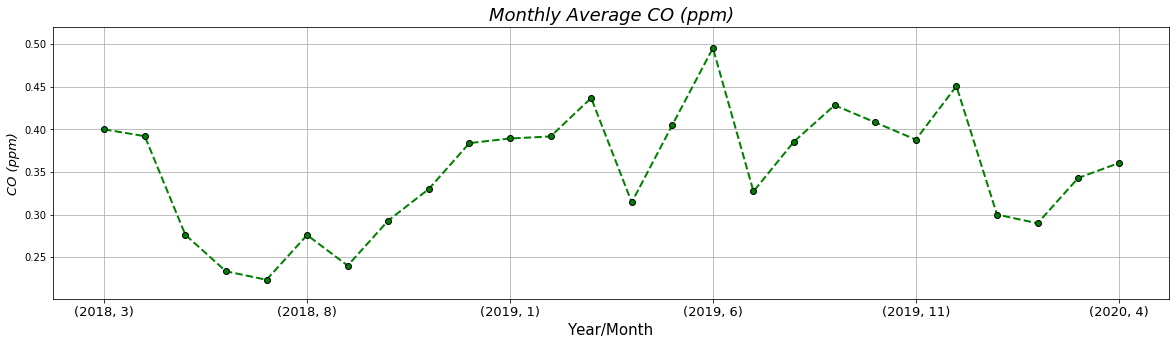

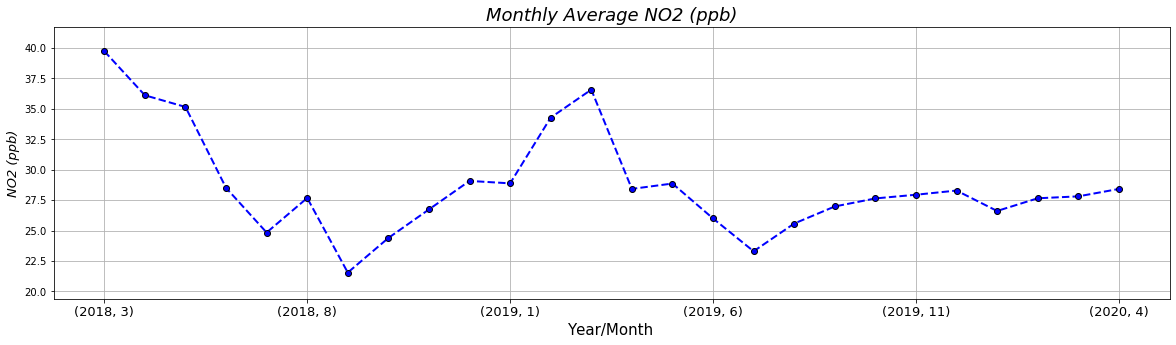

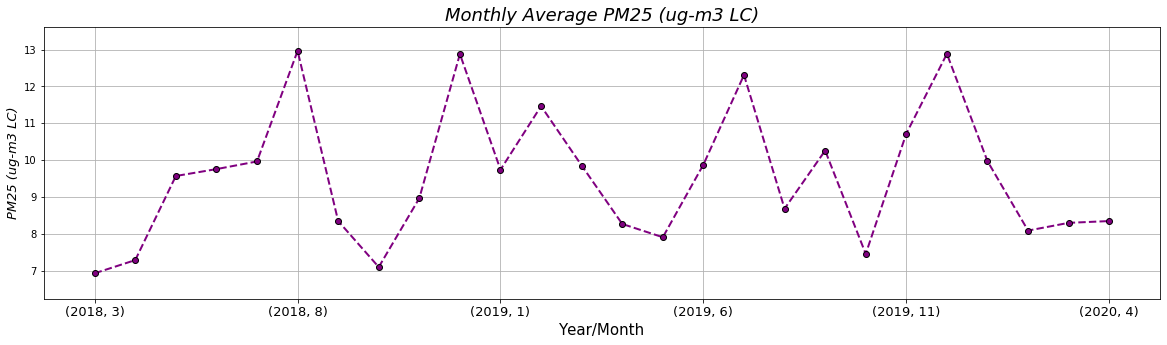

In [13]:
#create a  df list and label names that we will create a line plot for
y_names=["CO (ppm)","NO2 (ppb)","PM25 (ug-m3 LC)"]
y_list=[co_monthly_mean,no2_monthly_mean,PM25_df_monthly_mean]

colors=["green","blue","purple"]
xticks=np.arange(0,co_monthly_mean.count(),1)
#set up a counter to iterate through multiple lists at once
counter=0


#begin loop through y values to make sure all plots for one pollutant are on one row
for y in y_list:

    #create and format the lines
    group=y.plot(kind="line",figsize=(20,5),
                 color=colors[counter],
                 marker="o",
                 markeredgecolor="black",
                linewidth=2,
                linestyle="--")
    
    plt.title(f"Monthly Average {y_names[counter]}",
              fontsize=18,
              fontstyle="oblique")
    plt.ylim((y.min()*.9,y.max()*1.05))
    plt.xticks(fontsize=13)
    plt.xlabel("Year/Month",fontsize=15)
    
    plt.ylabel(f"{y_names[counter]}",
               fontsize=13,
               fontstyle="italic")

    plt.grid()
    plt.savefig(f"../plots/{y_names[counter]}_Monthly_Plot.png")
    
    counter+=1

    plt.show()